In [96]:
%matplotlib inline

import numpy as np
import random
import requests as rq
import sys
import io
import re
import pandas as pd
import matplotlib.pyplot as plt
from gensim import models
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/abby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/abby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
  = Word2Vec.load("./models/fox.model")
model_reuters = Word2Vec.load("./models/reuters.model")
model_the_hill = Word2Vec.load("./models/the_hill.model")
model_cnn = Word2Vec.load("./models/cnn.model")
model_nyt = Word2Vec.load("./models/nyt.model")

In [5]:
adjectives = ['disorganized', 'devious', 'impressionable', 'circumspect', 'impassive', 
             'aimless', 'effeminate', 'unfathomable', 'fickle', 'unprincipled', 'inoffensive', 
             'reactive', 'providential', 'resentful', 'bizarre', 'impractical',
             'sarcastic', 'misguided', 'imitative', 'pedantic', 'venomous', 'erratic', 'insecure', 
             'resourceful', 'neurotic', 'forgiving', 'profligate', 'whimsical', 'assertive', 
             'incorruptible', 'individualistic', 'faithless', 'disconcerting', 'barbaric', 
             'hypnotic', 'vindictive', 'observant', 'dissolute', 'frightening', 'complacent', 
             'boisterous', 'pretentious', 'disobedient', 'tasteless', 'sedentary', 
             'sophisticated', 'regimental', 'mellow', 'deceitful', 'impulsive', 'playful', 
             'sociable', 'methodical', 'willful', 'idealistic', 'boyish', 'callous', 'pompous', 
             'unchanging', 'crafty', 'punctual', 'compassionate', 'intolerant', 'challenging', 
             'scornful', 'possessive', 'conceited', 'imprudent', 'dutiful', 'lovable', 
             'disloyal', 'dreamy', 'appreciative', 'forgetful', 'unrestrained', 'forceful', 
             'submissive', 'predatory', 'fanatical', 'illogical', 'tidy', 'aspiring', 'studious', 
             'adaptable', 'conciliatory', 'artful', 'thoughtless', 'deceptive', 'frugal', 
             'reflective', 'insulting', 'unreliable', 'stoic', 'hysterical', 'rustic', 
             'inhibited', 'outspoken', 'unhealthy', 'ascetic', 'skeptical', 'painstaking', 
             'contemplative', 'leisurely', 'sly', 'mannered', 'outrageous', 'lyrical', 
             'placid', 'cynical', 'irresponsible', 'vulnerable', 'arrogant', 'persuasive', 
             'perverse', 'steadfast', 'crisp', 'envious', 'naive', 'greedy', 'presumptuous', 
             'obnoxious', 'irritable', 'dishonest', 'discreet', 'sporting', 'hateful', 
             'ungrateful', 'frivolous', 'reactionary', 'skillful', 'cowardly', 'sordid', 
             'adventurous', 'dogmatic', 'intuitive', 'bland', 'indulgent', 'discontented', 
             'dominating', 'articulate', 'fanciful', 'discouraging', 'treacherous', 
             'repressed', 'moody', 'sensual', 'unfriendly', 'optimistic', 'clumsy', 
             'contemptible', 'focused', 'haughty', 'morbid', 'disorderly', 'considerate', 
             'humorous', 'preoccupied', 'airy', 'impersonal', 'cultured', 'trusting', 
             'respectful', 'scrupulous', 'scholarly', 'superstitious', 'tolerant', 
             'realistic', 'malicious', 'irrational', 'sane', 'colorless', 'masculine', 
             'witty', 'inert', 'prejudiced', 'fraudulent', 'blunt', 'childish', 'brittle', 
             'disciplined', 'responsive', 'courageous', 'bewildered', 'courteous', 
             'stubborn', 'aloof', 'sentimental', 'athletic', 'extravagant', 'brutal', 
             'manly', 'cooperative', 'unstable', 'youthful', 'timid', 'amiable', 'retiring', 
             'fiery', 'confidential', 'relaxed', 'imaginative', 'mystical', 'shrewd', 
             'conscientious', 'monstrous', 'grim', 'questioning', 'lazy', 'dynamic', 
             'gloomy', 'troublesome', 'abrupt', 'eloquent', 'dignified', 'hearty', 'gallant', 
             'benevolent', 'maternal', 'paternal', 'patriotic', 'aggressive', 'competitive', 
             'elegant', 'flexible', 'gracious', 'energetic', 'tough', 'contradictory', 
             'shy', 'careless', 'cautious', 'polished', 'sage', 'tense', 'caring', 
             'suspicious', 'sober', 'neat', 'transparent', 'disturbing', 'passionate', 
             'obedient', 'crazy', 'restrained', 'fearful', 'daring', 'prudent', 'demanding', 
             'impatient', 'cerebral', 'calculating', 'amusing', 'honorable', 'casual',
             'sharing', 'selfish', 'ruined', 'spontaneous', 'admirable', 'conventional', 
             'cheerful', 'solitary', 'upright', 'stiff', 'enthusiastic', 'petty', 'dirty', 
             'subjective', 'heroic', 'stupid', 'modest', 'impressive', 'orderly', 'ambitious', 
             'protective', 'silly', 'alert', 'destructive', 'exciting', 'crude', 'ridiculous', 
             'subtle', 'mature', 'creative', 'coarse', 'passive', 'oppressed', 'accessible', 
             'charming', 'clever', 'decent', 'miserable', 'superficial', 'shallow', 'stern', 
             'winning', 'balanced', 'emotional', 'rigid', 'invisible', 'desperate', 'cruel', 
             'romantic', 'agreeable', 'hurried', 'sympathetic', 'solemn', 'systematic', 
             'vague', 'peaceful', 'humble', 'dull', 'expedient', 'loyal', 'decisive', 
             'arbitrary', 'earnest', 'confident', 'conservative', 'foolish', 'moderate', 
             'helpful', 'delicate', 'gentle', 'dedicated', 'hostile', 'generous', 'reliable', 
             'dramatic', 'precise', 'calm', 'healthy', 'attractive', 'artificial', 
             'progressive', 'odd', 'confused', 'rational', 'brilliant', 'intense', 
             'genuine', 'mistaken', 'driving', 'stable', 'objective', 'sensitive', 
             'neutral', 'strict', 'angry', 'profound', 'smooth', 'ignorant', 'thorough', 
             'logical', 'intelligent', 'extraordinary', 'experimental', 'steady', 
             'formal', 'faithful', 'curious', 'reserved', 'honest', 'busy', 'educated', 
             'liberal', 'friendly', 'efficient', 'sweet', 'surprising', 'mechanical', 
             'clean', 'critical', 'criminal', 'soft', 'proud', 'quiet', 'weak', 'anxious', 
             'solid', 'complex', 'grand', 'warm', 'slow', 'false', 'extreme', 'narrow', 
             'dependent', 'wise', 'organized', 'pure', 'directed', 'dry', 'obvious', 'popular', 
             'capable', 'secure', 'active', 'independent', 'ordinary', 'fixed', 'practical', 
             'serious', 'fair', 'understanding', 'constant', 'cold', 'responsible', 'deep', 
             'religious', 'private', 'simple', 'physical', 'original', 'working', 'strong', 
             'modern', 'determined', 'open', 'political', 'difficult', 'knowledge', 'kind']

In [23]:
testing_words = ["gun", "metoo", "america", "tax", "abortion", "democrat", "republican", "nra", 
                 "trump", "biden", "china", "gay", "lesbian"]

women_list = ['daughter', 'mother', 'woman', 'girl', 'female', 
              'sister', 'aunt', 'niece']
men_list = ['son', 'father', 'man', 'boy', 'male', 'brother',
            'uncle', 'nephew']

straight_list = ['heterosexual', 'straight']
lgbt_list = ['gay', 'trans', 'bisexual', 'lesbian', 'homosexual']

religion_list = ['god', 'church', 'religion', 'sacred', 'jesus']
secular_list = ['secular', 'atheist', 'agnostic']

d_list = ['democrat', 'liberal', 'right', 'pelosi', 'obama']
r_list = ['republican', 'conservative', 'left', 'trump', 'mcconnell']

In [163]:
def print_adj_dists(news_source, model, word_list, compare_wordlist):  # prints the top 5 words in 'compare_wordlist' nearest to the words in the wordlist for a given model
    # for each word, print a dataframe of the compare_wordlist words to that word
    for word in word_list:
        # build list of compare_wordlist word distances
        word_dists = []
        for ind in range(len(compare_wordlist)):
            adj = compare_wordlist[ind]
            try:
                dist = model.wv.distance(word, adj)
                word_dists.append([news_source, word, adj, dist])
            except:
                word_dists.append([news_source, word, adj, None])

        # create result dataframe and print output
        df = pd.DataFrame(word_dists, columns=['source','word', 'adj', 'dist'])
        df_sorted = df.sort_values(by='dist', ascending=True)
        display(df_sorted.head(5))
        
def print_word_dists_each_model(wordlist, compare_wordlist): # prints the top 5 words in 'compare_wordlist' nearest to the words in the wordlist for all 5 models
    print_adj_dists("Fox News", model_fox, wordlist, compare_wordlist)
    print_adj_dists("Reuters", model_reuters, wordlist, compare_wordlist)
    print_adj_dists("The Hill", model_the_hill, wordlist, compare_wordlist)
    print_adj_dists("NYT", model_nyt, wordlist, compare_wordlist)
    print_adj_dists("CNN", model_cnn, wordlist, compare_wordlist)
    
def find_avg_loc(model, wordlist): # given a wordlist, returns the average of the words' locations in a given model
    avg = [0]*100
    for i in range(0, len(wordlist)):
        avg += model.wv.get_vector(wordlist[i])
    avg /= len(wordlist)
    return avg

def find_avg_dists(news_source, model, wordlist_name, wordlist, compare_wordlist, print_output=True): # prints the top 5 words in 'compare_wordlist' that are nearest to the average location of the words in the wordlist for a given model, returns the list of adjectives and distances
    word_dists = []
    # find avg loc of wordlist
    avg_loc = find_avg_loc(model, wordlist)
    
    # for each compare_word, attempts to find distance from avg loc to compare word but throws an error if compare_word is not in model
    for ind in range(len(compare_wordlist)):
        compare_word = compare_wordlist[ind]
        try: 
            dist = abs(np.linalg.norm(avg_loc-model.wv.get_vector(compare_word)))
            word_dists.append([news_source, wordlist_name, compare_word, dist])
        except:
            word_dists.append([news_source, wordlist_name, compare_word, None])

    # create new dataframe to hold result, print if desired
    df = pd.DataFrame(word_dists, columns=['news_source', 'wordlist_name', 'compare_word', 'dist'])
    if print_output:
        df_sorted = df.sort_values(by='dist', ascending=True)
        print(df.shape)
        display(df_sorted.head())
    return df

def find_avg_dists_each_model(wordlist_name, wordlist, compare_wordlist): # prints the top 5 words in 'compare_wordlist' that are nearest to the average location of the words in the wordlist for all 5 models, returns the list of adjectives and distances
    find_avg_dists("Fox", model_fox, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("Reuters", model_reuters, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("The Hill", model_the_hill, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("NYT", model_nyt, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("CNN", model_cnn, wordlist_name, wordlist, compare_wordlist)
    
def find_avg_dists_compare(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # for 2 wordlists and mo, computes the average location and distances to words in 'compare_wordlist' then prints the adjectives nearest to each wordlist
    # find avg loc of wordlists and dists from avg loc to all 'compare_wordlist' words
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)

    # print line helps to analyze for constant reference
    print("""\nif difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1\n""")
    
    # create new dataframe for visual analysis
    diffs = pd.DataFrame()
    diffs['news_source'] = dists1['news_source']
    diffs['wordlist1'] = wordlist_name1
    diffs['wordlist2'] = wordlist_name2
    diffs['compare_word'] = dists1['compare_word']
    diffs['diff'] = dists1['dist']-dists2['dist']
    
    # print all of dataframe if small, otherwise print top and bottom 5
    df_sorted = diffs.sort_values(by='diff', ascending=False)
    display(df_sorted.head())
    if len(df_sorted) > 5:
        df_sorted = diffs.sort_values(by='diff', ascending=True)
        display(df_sorted.head())
    
def find_avg_dists_compare_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # for 2 wordlists and all 5 models, computes the average location and distances to words in 'compare_wordlist' then prints the adjectives nearest to each wordlist
    find_avg_dists_compare("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist) 
    
    
def find_avg_relative_dists(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # prints top 5 words associated with each wordlist using relative distance
    # find avg loc of wordlists and the dists from that avg loc to all 'compare_wordlist' words
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)
    
    # compute relative distance: percentage of sum of distances relevant to each wordlist
    rel1 = dists1['dist']/(dists1['dist']+dists2['dist'])
    rel2 = dists2['dist']/(dists1['dist']+dists2['dist'])
    
    # construct new dataframe
    rels = pd.DataFrame()
    rels['news_source'] = dists1['news_source']
    rels['compare_word'] = dists1['compare_word']
    rels['wordlist1'] = wordlist_name1
    rels['rel_dist_1'] = rel1
    rels['wordlist2'] = wordlist_name2
    rels['rel_dist_2'] = rel2
    
    # print entire wordlist if small, otherwise print top 5 words most relatively close to each wordlist
    df_sorted = rels.sort_values(by='rel_dist_1', ascending=False)
    display(df_sorted.head())
    if len(df_sorted) > 5:
        df_sorted = rels.sort_values(by='rel_dist_2', ascending=False)
        display(df_sorted.head())
    print("\n")
    
def find_rel_dists_compare_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # prints top 5 words associated with each wordlist by relative distance, for all 5 models
    find_avg_relative_dists("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)  
    
    
def find_rel_dists_one_word(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # basically same as above but used to print output in a nicer format across all models
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)
    
    rel1 = dists1['dist']/(dists1['dist']+dists2['dist'])
    rel2 = dists2['dist']/(dists1['dist']+dists2['dist'])
    
    rels = pd.DataFrame()
    rels['news_source'] = dists1['news_source']
    rels['compare_word'] = dists1['compare_word']
    rels['wordlist1'] = wordlist_name1
    rels['rel_dist_1'] = rel1
    rels['wordlist2'] = wordlist_name2
    rels['rel_dist_2'] = rel2
    
    return rels
    
def find_rel_dists_one_word_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist): # prints relative distance between 2 wordlists for a single compare_word in one dataframe
    # concat result for each word into one dataframe
    dists = []
    dists.append( find_rel_dists_one_word("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    result = pd.concat(dists).reset_index(drop=True)
    return result

In [154]:
plot_df = find_rel_dists_one_word_each_model('homosexual', ['homosexual'], 'heterosexual', ['heterosexual'], ['love','family'])

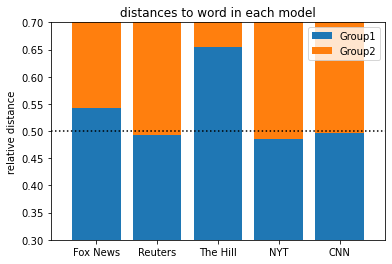

In [120]:
labels = plot_df['news_source']
group1_dist = plot_df['rel_dist_1']
group2_dist = plot_df['rel_dist_2']

fig, ax = plt.subplots()

ax.bar(labels, group1_dist, label="Group1")
ax.bar(labels, group2_dist, label="Group2", bottom = group1_dist)

ax.set_ylabel("relative distance")
ax.set_title("distances to word in each model")
ax.legend()

plt.axhline(y=.5, color='black', linestyle=":")
plt.axis([-.75,4.75, .3,.7])
plt.show()

In [135]:
find_rel_dists_compare_each_model('gay', ['gay'], 'het', ['heterosexual'], ['love'])

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Fox News,love,gay,0.593213,het,0.406787


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,Reuters,love,gay,0.470534,het,0.529466


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,The Hill,love,gay,0.561459,het,0.438541


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,NYT,love,gay,0.484331,het,0.515669


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
0,CNN,love,gay,0.528981,het,0.471019


In [164]:
find_avg_dists_compare_each_model("r", r_list, "d", d_list, adjectives)


if difference between dists is positive, association is stronger 
with wordlist1. if negative, association is stronger with wordlist2

    news_source wordlist1 wordlist2   compare_word      diff
365    Fox News         r         d        liberal  0.333428
334    Fox News         r         d    progressive  0.260493
109    Fox News         r         d  irresponsible  0.221325
122    Fox News         r         d      dishonest  0.203352
385    Fox News         r         d        extreme  0.199620
    news_source wordlist1 wordlist2  compare_word      diff
386    Fox News         r         d        narrow -0.321350
206    Fox News         r         d   questioning -0.307791
176    Fox News         r         d         blunt -0.295692
342    Fox News         r         d       driving -0.264825
318    Fox News         r         d  conservative -0.249077

if difference between dists is positive, association is stronger 
with wordlist1. if negative, association is stronger with wordlist2

  

In [158]:
print_word_dists_each_model(['ocasio'], adjectives)

(423, 4)
       source    word           adj      dist
334  Fox News  ocasio   progressive  0.370098
40   Fox News  ocasio    boisterous  0.443925
264  Fox News  ocasio  enthusiastic  0.447008
16   Fox News  ocasio     sarcastic  0.463494
365  Fox News  ocasio       liberal  0.469194
(423, 4)
      source    word          adj      dist
64   Reuters  ocasio     scornful  0.405611
1    Reuters  ocasio      devious  0.417613
23   Reuters  ocasio  resourceful  0.439989
334  Reuters  ocasio  progressive  0.441955
13   Reuters  ocasio    resentful  0.456405
(423, 4)
       source    word          adj      dist
334  The Hill  ocasio  progressive  0.530572
133  The Hill  ocasio     dogmatic  0.556372
365  The Hill  ocasio      liberal  0.561867
182  The Hill  ocasio   bewildered  0.573931
86   The Hill  ocasio  thoughtless  0.591602
(423, 4)
    source    word           adj      dist
334    NYT  ocasio   progressive  0.328578
365    NYT  ocasio       liberal  0.416380
419    NYT  ocasio     po

In [162]:
print_word_dists_each_model(['shooting'], adjectives)

(423, 4)
       source      word          adj      dist
179  Fox News  shooting  disciplined  0.486670
38   Fox News  shooting  frightening  0.510087
92   Fox News  shooting        stoic  0.525629
304  Fox News  shooting      hurried  0.540596
43   Fox News  shooting    tasteless  0.542874
(423, 4)
      source      word       adj      dist
92   Reuters  shooting     stoic  0.496251
187  Reuters  shooting  athletic  0.525407
64   Reuters  shooting  scornful  0.532825
268  Reuters  shooting    heroic  0.535264
59   Reuters  shooting    crafty  0.552180
(423, 4)
       source      word           adj      dist
115  The Hill  shooting         crisp  0.521371
149  The Hill  shooting  contemptible  0.606837
86   The Hill  shooting   thoughtless  0.609420
182  The Hill  shooting    bewildered  0.609676
304  The Hill  shooting       hurried  0.615771
(423, 4)
    source      word           adj      dist
239    NYT  shooting    disturbing  0.521737
117    NYT  shooting         naive  0.551564
3

In [29]:
print_word_dists_each_model(['metoo'])

(423, 4)
       source   word          adj      dist
131  Fox News  metoo       sordid  0.397127
81   Fox News  metoo     aspiring  0.448535
96   Fox News  metoo    outspoken  0.494659
257  Fox News  metoo  spontaneous  0.505243
75   Fox News  metoo     forceful  0.507450
(423, 4)
      source   word         adj      dist
93   Reuters  metoo  hysterical  0.410461
6    Reuters  metoo  effeminate  0.440745
62   Reuters  metoo  intolerant  0.446195
297  Reuters  metoo   emotional  0.467436
239  Reuters  metoo  disturbing  0.469760
(423, 4)
       source   word          adj      dist
257  The Hill  metoo  spontaneous  0.451610
200  The Hill  metoo  imaginative  0.477864
212  The Hill  metoo     eloquent  0.485439
133  The Hill  metoo     dogmatic  0.486279
93   The Hill  metoo   hysterical  0.489868
(423, 4)
    source   word           adj      dist
93     NYT  metoo    hysterical  0.494415
128    NYT  metoo   reactionary  0.513331
133    NYT  metoo      dogmatic  0.522175
64     NYT  meto

In [31]:
print_word_dists_each_model(['american'])

(423, 4)
       source      word            adj      dist
286  Fox News  american      oppressed  0.430025
143  Fox News  american      repressed  0.470680
203  Fox News  american  conscientious  0.476445
183  Fox News  american      courteous  0.496688
303  Fox News  american      agreeable  0.500179
(423, 4)
      source      word           adj      dist
182  Reuters  american    bewildered  0.555218
64   Reuters  american      scornful  0.565878
0    Reuters  american  disorganized  0.575307
20   Reuters  american      venomous  0.578273
187  Reuters  american      athletic  0.583312
(423, 4)
       source      word             adj      dist
44   The Hill  american       sedentary  0.452374
13   The Hill  american       resentful  0.462171
216  The Hill  american      benevolent  0.483714
399  The Hill  american        ordinary  0.485799
2    The Hill  american  impressionable  0.493461
(423, 4)
    source      word           adj      dist
137    NYT  american  discontented  0.48510

In [108]:
print_word_dists_each_model(['gay'],adjectives)

(423, 4)
       source word        adj      dist
409  Fox News  gay  religious  0.347774
359  Fox News  gay   faithful  0.436792
36   Fox News  gay  observant  0.438457
219  Fox News  gay  patriotic  0.461062
70   Fox News  gay   disloyal  0.465378
(423, 4)
      source word            adj      dist
6    Reuters  gay     effeminate  0.335556
409  Reuters  gay      religious  0.338617
171  Reuters  gay      masculine  0.437826
62   Reuters  gay     intolerant  0.442069
164  Reuters  gay  superstitious  0.446441
(423, 4)
       source word         adj      dist
409  The Hill  gay   religious  0.433383
36   The Hill  gay   observant  0.448477
218  The Hill  gay    paternal  0.508741
76   The Hill  gay  submissive  0.515212
182  The Hill  gay  bewildered  0.523154
(423, 4)
    source word          adj      dist
409    NYT  gay    religious  0.427428
6      NYT  gay   effeminate  0.439897
133    NYT  gay     dogmatic  0.477571
174    NYT  gay   prejudiced  0.481406
42     NYT  gay  disobedi

In [140]:
find_rel_dists_compare_each_model('homosexual',['homosexual'],'heterosexual',['heterosexual'],adjectives)

,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
260,Fox News,cheerful,homosexual,0.743492,heterosexual,0.256508
145,Fox News,sensual,homosexual,0.741651,heterosexual,0.258349
23,Fox News,resourceful,homosexual,0.740338,heterosexual,0.259662
2,Fox News,impressionable,homosexual,0.738444,heterosexual,0.261556
76,Fox News,submissive,homosexual,0.736034,heterosexual,0.263966


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
409,Fox News,religious,homosexual,0.450686,heterosexual,0.549314
125,Fox News,hateful,homosexual,0.482657,heterosexual,0.517343
365,Fox News,liberal,homosexual,0.484289,heterosexual,0.515711
351,Fox News,ignorant,homosexual,0.488018,heterosexual,0.511982
301,Fox News,cruel,homosexual,0.488390,heterosexual,0.511610


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
217,Reuters,maternal,homosexual,0.550407,heterosexual,0.449593
259,Reuters,conventional,homosexual,0.546005,heterosexual,0.453995
228,Reuters,shy,homosexual,0.538415,heterosexual,0.461585
282,Reuters,mature,homosexual,0.538384,heterosexual,0.461616
196,Reuters,retiring,homosexual,0.537323,heterosexual,0.462677


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
125,Reuters,hateful,homosexual,0.442182,heterosexual,0.557818
90,Reuters,insulting,homosexual,0.453465,heterosexual,0.546535
309,Reuters,peaceful,homosexual,0.456334,heterosexual,0.543666
146,Reuters,unfriendly,homosexual,0.459066,heterosexual,0.540934
108,Reuters,cynical,homosexual,0.463954,heterosexual,0.536046


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
2,The Hill,impressionable,homosexual,0.772596,heterosexual,0.227404
36,The Hill,observant,homosexual,0.770997,heterosexual,0.229003
44,The Hill,sedentary,homosexual,0.769311,heterosexual,0.230689
152,The Hill,morbid,homosexual,0.765738,heterosexual,0.234262
80,The Hill,tidy,homosexual,0.764196,heterosexual,0.235804


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
256,The Hill,ruined,homosexual,0.444938,heterosexual,0.555062
125,The Hill,hateful,homosexual,0.543775,heterosexual,0.456225
374,The Hill,soft,homosexual,0.551593,heterosexual,0.448407
318,The Hill,conservative,homosexual,0.575130,heterosexual,0.424870
300,The Hill,desperate,homosexual,0.582204,heterosexual,0.417796


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
44,NYT,sedentary,homosexual,0.532665,heterosexual,0.467335
364,NYT,educated,homosexual,0.531066,heterosexual,0.468934
332,NYT,attractive,homosexual,0.525104,heterosexual,0.474896
221,NYT,competitive,homosexual,0.523180,heterosexual,0.476820
282,NYT,mature,homosexual,0.523142,heterosexual,0.476858


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
33,NYT,barbaric,homosexual,0.413190,heterosexual,0.586810
130,NYT,cowardly,homosexual,0.428579,heterosexual,0.571421
56,NYT,callous,homosexual,0.436862,heterosexual,0.563138
174,NYT,prejudiced,homosexual,0.438619,heterosexual,0.561381
307,NYT,systematic,homosexual,0.441118,heterosexual,0.558882


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
364,CNN,educated,homosexual,0.545512,heterosexual,0.454488
282,CNN,mature,homosexual,0.536134,heterosexual,0.463866
296,CNN,balanced,homosexual,0.525929,heterosexual,0.474071
264,CNN,enthusiastic,homosexual,0.525211,heterosexual,0.474789
331,CNN,healthy,homosexual,0.524089,heterosexual,0.475911


,news_source,compare_word,wordlist1,rel_dist_1,wordlist2,rel_dist_2
53,CNN,willful,homosexual,0.422230,heterosexual,0.577770
130,CNN,cowardly,homosexual,0.427076,heterosexual,0.572924
301,CNN,cruel,homosexual,0.431063,heterosexual,0.568937
7,CNN,unfathomable,homosexual,0.431064,heterosexual,0.568936
33,CNN,barbaric,homosexual,0.431969,heterosexual,0.568031
